In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import math

In [2]:
# Problem 1: Implement an algorithm to read in the Iris dataset.

In [16]:
iris = pd.read_csv('iris.csv')

In [17]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Problem 2: Implement an algorithm to visually see two sets of features and the class they belong to.

In [5]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
feature_1 = 'Sepal.Width'
feature_2 = 'Petal.Width'

In [7]:
def feature_display(feature_1, feature_2):
    colors = {"setosa": 'red', 'versicolor': 'blue', 'virginica': 'black'}

    fig, ax = plt.subplots(figsize = (10, 5))
    ax.scatter(iris[feature_1], iris[feature_2], color = iris['Species'].apply(lambda x: colors[x]))
    ax.set_title(feature_1 + ' vs ' + feature_2 + ' by species')
    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    patchlist = []

    for c in colors:
        data_key = mpatches.Patch(color = colors[c], label = c)
        patchlist.append(data_key)

    plt.legend(handles = patchlist)
    
    plt.show()


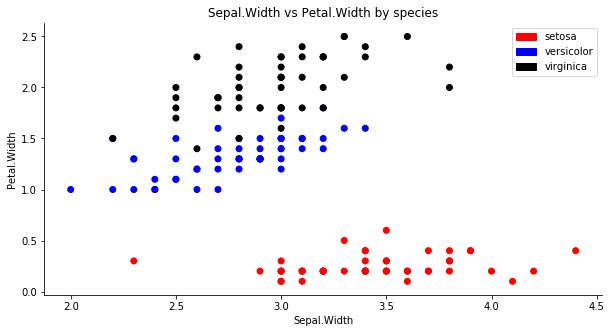

In [8]:
feature_display(feature_1, feature_2)

# Problem 3: Develop an algorithm to sort the five features in the dataset to determine if any of the five sorted features can separate the three plant types. Show the efficiency of your sorting algorithm based on its ability to sort the five sets of features.

Given: Sepal length, Sepal width, Petal length and Petal width

Goal: Determine what species the plant is ('setosa', 'versicolor', 'virginica') using a sorting algorithm, we also need to show the efficiency of the algorithm


1) Use the groupby function to check the average Sepal.Length, Sepal.Width and Petal.Length. We use this information to assign the new class after sorting

In [10]:
groupby_df = iris.groupby(['Species'])['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'].mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [11]:
# create a dictionary to store the class assignment for each feature based on its measurement 
# (from the smallest to the largest)

class_assigned = {'Sepal.Length': ['setosa', 'versicolor', 'virginica'], 
                  'Sepal.Width': ['versicolor', 'virginica', 'setosa'],
                 'Petal.Length': ['setosa', 'versicolor', 'virginica'],
                 'Petal.Width': ['setosa', 'versicolor', 'virginica']}

In [12]:
def merge(list_input, left_list, right_list):
    i = 0
    j = 0
    
    result = []
    
    while i < len(left_list) and j < len(right_list):
        # if the value in the left list is less than or equal to the value in the right list, we append it to the result list
        if left_list[i] <= right_list[j]:
            result.append(left_list[i])
            i = i + 1
        else:
            # otherwise, append the value in the right list
            result.append(right_list[j])
            j = j + 1
    
    # append the leftover value in the left and right list
    while i < len(left_list):
        result.append(left_list[i])
        i = i + 1
    
    while j < len(right_list):
        result.append(right_list[j])
        j = j + 1
    return result

In [13]:
def merge_sort(list_input):
    # recursively call the merge function until it only has one value left
    if len(list_input) > 1:
        mid = len(list_input)//2
        left_list = list_input[:mid]
        right_list = list_input[mid:]
        merge_sort(left_list)
        merge_sort(right_list)
        return merge(list_input, left_list, right_list)

In [14]:
def class_accuracy(dataframe, feature):
    # convert the column values into a list
    list_input = dataframe[feature].tolist()
    # merge sort the list
    output_array = merge_sort(list_input)
    # convert the sorted result into a column
    feature_series = pd.Series(output_array)
    # create a column to store the predicted class value
    final_list = []
    for key in class_assigned[feature]:
        class_list = []
        class_list = [key] * len(iris[iris['Species'] == key])
        final_list.append(class_list)
    class_series = pd.Series([item for sublist in final_list for item in sublist])
    # create a dataframe to store the feature value and its predicted class value
    classified_df = pd.concat([class_series, feature_series], axis = 1)
    classified_df.columns = ['Species_Predicted', feature]
    # gather the original data
    original_df = dataframe[[feature, 'Species']]
    # sort the original dataframe
    original_df_sorted = original_df.sort_values(feature).reset_index(drop = True)
    # compare the predicted class with the original class to see how well our algorithm in sorting the 
    merge_df = pd.concat([original_df_sorted, classified_df], axis = 1)
    num_correct_percentage = sum(merge_df['Species'] == merge_df['Species_Predicted']) / len(merge_df)
    return num_correct_percentage


In [15]:
dataframe = iris
feature_list = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
for feature in feature_list:
    print('The sorting algorithm using ' + feature + " has an accuracy of " + str("{0:.1%}".format(class_accuracy(dataframe, feature))))
    
    

The sorting algorithm using Sepal.Length has an accuracy of 74.0%
The sorting algorithm using Sepal.Width has an accuracy of 59.3%
The sorting algorithm using Petal.Length has an accuracy of 96.0%
The sorting algorithm using Petal.Width has an accuracy of 94.7%
